**Winter 2021 Data Science Intern Challenge**

Question 1 

a. To calcuate the Average Order Value, the revenue must be divided by the number of orders. However, the 3,145.13 calculated is not a great reflection of this metric because it is merely the mean of the order amount. 

A better evaluation of this data would be to find the average cost of the item being sold across all 100 stores. This will give Shopify a better sense of how much the product is priced. 

b. The metric that will better represent this data is the average cost of the product. 



In [69]:
import pandas as pd

In [70]:
df = pd.read_excel('/Data.xlsx')

In [71]:
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56.190
1,2,92,925,90,1,cash,2017-03-03 17:38:51.999
2,3,44,861,144,1,cash,2017-03-14 04:23:55.595
3,4,18,935,156,1,credit_card,2017-03-26 12:43:36.649
4,5,18,883,156,1,credit_card,2017-03-01 04:35:10.773


First, the data from the excel sheet is imported, and the information about this dataset is generated below. From there, we can tell that there is a total number of 5000 orders placed over a 30-day window.


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        5000 non-null   int64         
 1   shop_id         5000 non-null   int64         
 2   user_id         5000 non-null   int64         
 3   order_amount    5000 non-null   int64         
 4   total_items     5000 non-null   int64         
 5   payment_method  5000 non-null   object        
 6   created_at      5000 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 273.6+ KB


In [73]:
df['cost_per_item'] = df.order_amount/df.total_items

To find the cost of each item sold in each shop, the order amount is divided by the total items for each order. 

In [74]:
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,cost_per_item
0,1,53,746,224,2,cash,2017-03-13 12:36:56.190,112.0
1,2,92,925,90,1,cash,2017-03-03 17:38:51.999,90.0
2,3,44,861,144,1,cash,2017-03-14 04:23:55.595,144.0
3,4,18,935,156,1,credit_card,2017-03-26 12:43:36.649,156.0
4,5,18,883,156,1,credit_card,2017-03-01 04:35:10.773,156.0


From there, the average price for the product is calculated by dividing the sum of the cost by the total number of orders. 


In [75]:
sum(df.cost_per_item)/len(df.order_id)

387.7428

c. 387.74 was the average cost found for the shoe, and considering the fact that these shops are relatively affordable, it seems to be on the high side. 


In [84]:
df1=df[['shop_id','cost_per_item']]
df1.groupby(['shop_id']).mean()

,cost_per_item
shop_id,
1,158.0
2,94.0
3,148.0
4,128.0
5,142.0
...,...
96,153.0
97,162.0
98,133.0


It then became relevant to analyze the cost of the product across all 100 shops. There seemed to be a considerable disparity within the cost per item for each shop. This variation can be visualized in the box-plot below. The shop with ID 78 has a cost of 25725, making it the obvious outlier.

> Indented block



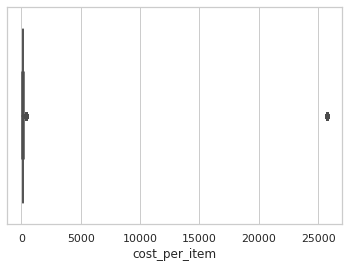

In [85]:
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.boxplot(x=df1["cost_per_item"])

In [86]:
df1 = df1[df1.shop_id != 78]

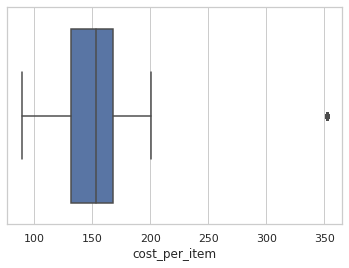

In [87]:
ax = sns.boxplot(x=df1["cost_per_item"])

To better assess the data provided, the outlier was excluded. From the box plot above, the median is about 150, which is more reasonable for the item being sold.  